In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
signal_data = np.cos(np.arange(1600)* (20*np.pi/1000))[:,None]

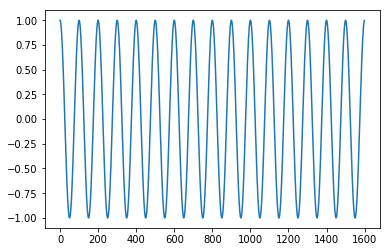

In [5]:
plot_x = np.arange(1600)
plt.plot(plot_x, signal_data)

In [6]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i: (i+look_back), 0])
        dataY.append(signal_data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

train = signal_data[:800]
valid = signal_data[800:1200]
test = signal_data[1200:]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(valid, look_back)
x_test, y_test = create_dataset(test, look_back)

In [8]:
from keras import *
from keras.layers import *

Using TensorFlow backend.


In [42]:
# model = Sequential()
# model.add(layers.Dense(32, input_dim=40, activation='relu'))
# model.add(layers.Dropout(0.3))
# for i in range(2):
#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.3))
# model.add(layers.Dense(1))

In [44]:
# model = Sequential()
# model.add(LSTM(32, input_shape=(None, 1)))
# model.add(Dropout(0.3))
# model.add(Dense(1))

In [45]:
# model = Sequential()
# model.add(LSTM(32, batch_input_shape=(1,look_back,1), stateful=True))
# model.add(Dropout(0.3))
# model.add(Dense(1))

In [46]:
# model = Sequential()
# for i in range(2):
#     model.add(LSTM(32, batch_input_shape =(1, look_back,1), stateful = True, return_sequences = True))
#     model.add(Dropout(0.3))
# model.add(LSTM(32, batch_input_shape=(1, look_back,1) , stateful= True))
# model.add(Dropout(0.3))
# model.add(Dense(1))

In [7]:
x_train.shape

(760, 40)

In [9]:
# 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [10]:
print(x_val.shape)
print(y_val.shape)

(360, 40, 1)
(360,)


In [9]:
x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [10]:
y_val.shape

(360,)

In [11]:
x_val.shape

(360, 40)

# 다층 퍼셉트론

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 0s 414us/step - loss: 0.1627 - val_loss: 0.0208
Epoch 2/200
760/760 [==============================] - 0s 75us/step - loss: 0.0536 - val_loss: 0.0037
Epoch 3/200
760/760 [==============================] - 0s 73us/step - loss: 0.0429 - val_loss: 0.0184
Epoch 4/200
760/760 [==============================] - 0s 75us/step - loss: 0.0409 - val_loss: 0.0106
Epoch 5/200
760/760 [==============================] - 0s 71us/step - loss: 0.0355 - val_loss: 0.0115
Epoch 6/200
760/760 [==============================] - 0s 70us/step - loss: 0.0341 - val_loss: 0.0165
Epoch 7/200
760/760 [==============================] - 0s 72us/step - loss: 0.0371 - val_loss: 0.0089
Epoch 8/200
760/760 [==============================] - 0s 72us/step - loss: 0.0301 - val_loss: 0.0067
Epoch 9/200
760/760 [==============================] - 0s 70us/step - loss: 0.0287 - val_loss: 0.0105
Epoch 10/200
760/760 [=============

760/760 [==============================] - 0s 86us/step - loss: 0.0109 - val_loss: 0.0107
Epoch 160/200
760/760 [==============================] - 0s 71us/step - loss: 0.0109 - val_loss: 0.0099
Epoch 161/200
760/760 [==============================] - 0s 66us/step - loss: 0.0100 - val_loss: 0.0102
Epoch 162/200
760/760 [==============================] - 0s 78us/step - loss: 0.0099 - val_loss: 0.0092
Epoch 163/200
760/760 [==============================] - 0s 79us/step - loss: 0.0100 - val_loss: 0.0097
Epoch 164/200
760/760 [==============================] - 0s 76us/step - loss: 0.0109 - val_loss: 0.0097
Epoch 165/200
760/760 [==============================] - 0s 71us/step - loss: 0.0091 - val_loss: 0.0092
Epoch 166/200
760/760 [==============================] - 0s 77us/step - loss: 0.0099 - val_loss: 0.0102
Epoch 167/200
760/760 [==============================] - 0s 78us/step - loss: 0.0105 - val_loss: 0.0087
Epoch 168/200
760/760 [==============================] - 0s 75us/step - loss: 

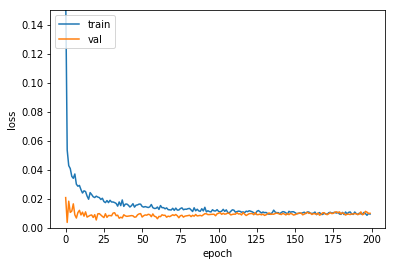

Train Score: 0.01
Valid Score : 0.01
Test Score : 0.01


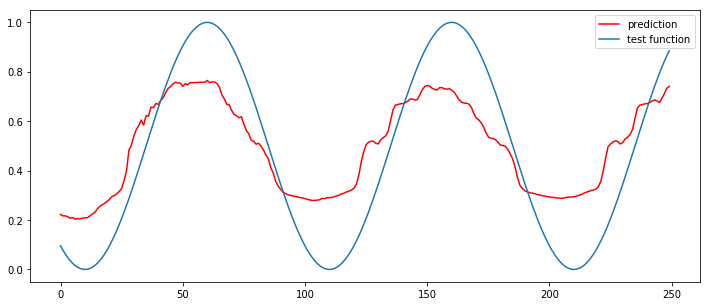

In [16]:
model = Sequential()
model.add(layers.Dense(32, input_dim=40, activation='relu'))
model.add(layers.Dropout(0.3))
for i in range(2):
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adagrad')

hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.2f'%(trainScore))
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Valid Score : %.2f'%(valScore))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score : %.2f'%(testScore))


look_ahead = 250
xhat = x_test[0,None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:, 1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label = 'test function')
plt.legend()
plt.show()

# 순환신경망

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 2ms/step - loss: 0.1743 - val_loss: 0.0566
Epoch 2/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0493 - val_loss: 0.0312
Epoch 3/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0320 - val_loss: 0.0175
Epoch 4/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0249 - val_loss: 0.0126
Epoch 5/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0169 - val_loss: 0.0080
Epoch 6/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0140 - val_loss: 0.0030
Epoch 7/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0024
Epoch 8/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0101 - val_loss: 0.0019
Epoch 9/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0079 - val_loss: 9.9463e-04
Epoch 10/200
760/760 [===================

Epoch 155/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 7.9784e-05
Epoch 156/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0019 - val_loss: 1.4811e-04
Epoch 157/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 3.2788e-05
Epoch 158/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 5.1622e-04
Epoch 159/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 9.6385e-05
Epoch 160/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 5.6402e-05
Epoch 161/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0019 - val_loss: 2.5574e-04
Epoch 162/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 1.2629e-04
Epoch 163/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0019 - val_loss: 3.8096e-04
Epoch 164/200
760/760 [==============

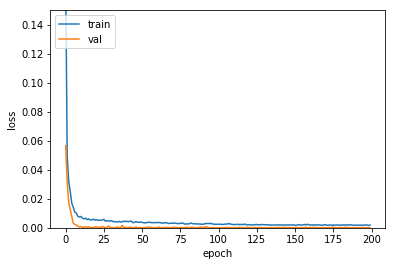

train score : 0.00
valid score : 0.00
test score : 0.00


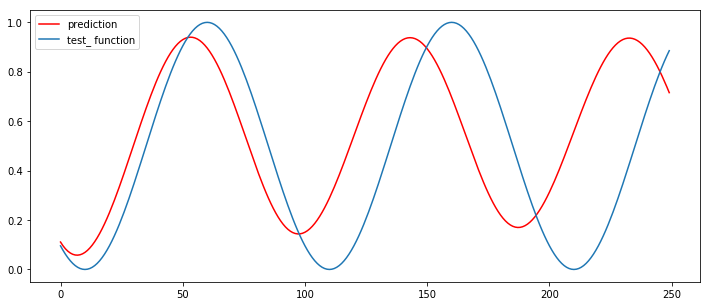

In [27]:
model = Sequential()
model.add(LSTM(32, input_shape=(None,1)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

trainscore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('train score : %.2f'%trainscore)
valscore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('valid score : %.2f'%valscore)
testscore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('test score : %.2f'%testscore)


look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r',label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test_ function')
plt.legend()
plt.show()

In [20]:
np.array([xhat]).shape

(1, 1, 40)

# 상태유지 순환신경망

In [31]:
import keras

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss =[]
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        
        
look_back = 40

model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

#training
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist],validation_data=(x_val, y_val))
    model.reset_states()
    
#validate

plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper_left')
plt.show()

trainscore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('train score %.2f'%trainscore)
valscore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('valid score %.2f'%valscore)
testscore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('test score %.2f'%testscore)

#test

look_ahead = 250
x_hat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions , 'r' , label = 'prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label = 'test function')
plt.legend()
plt.show()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 35s 47ms/step - loss: 0.0307 - val_loss: 0.0055
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 35s 46ms/step - loss: 0.0087 - val_loss: 0.0012
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 35s 46ms/step - loss: 0.0051 - val_loss: 0.0022
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 35s 46ms/step - loss: 0.0048 - val_loss: 0.0020
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 34s 45ms/step - loss: 0.0039 - val_loss: 9.0106e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 34s 45ms/step - loss: 0.0037 - val_loss: 6.9805e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 34s 45ms/st

760/760 [==============================] - 35s 46ms/step - loss: 0.0022 - val_loss: 4.3796e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
167/760 [=====>........................] - ETA: 22s - loss: 0.0018

KeyboardInterrupt: 

# 상태유지 스택 순환신경망

In [ ]:
import keras
class Customhistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss=[]
        self.val_loss=[]
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
                             
look_back=40

model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True) )
model.add(Dropout(0.3))
model.add(Dense(1))

#train
model.compile(loss = 'mean_squared_error', optimizer='adam')

custom_hist = Customhistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()
    
    
plt.plot(custom_hist.training_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.lengend(['train', 'val'], loc='upper left')
plt.show()

trainscore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('train score : %.2f'%trainscore)
valscore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('validation score : %.2f'%valscore)
testscore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('test score : %.2f'%testscore)

look_ahead = 250
xhat = x_test[0]
prediction = np.zeros((look_ahead,1))
for i in range(20):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label = 'prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead] , label='test function')
plt.legend()
plt.show()



Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 103s 136ms/step - loss: 0.0866 - val_loss: 0.0779
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 100s 132ms/step - loss: 0.0344 - val_loss: 0.0587
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 101s 132ms/step - loss: 0.0296 - val_loss: 0.0052
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 101s 133ms/step - loss: 0.0095 - val_loss: 0.0161
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 102s 134ms/step - loss: 0.0085 - val_loss: 0.0150
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 103s 135ms/step - loss: 0.0086 - val_loss: 0.0038
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 103s 13